In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
import folium 

In [2]:
# 데이터 불러오고 간단한 정보 확인
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.head(10)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
5,20809147,행신동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4128112800106470014011094,NaN,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,NaN,1,NaN,126.831632,37.619309
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4211010500101000000023668,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2,NaN,127.726905,37.880504
7,20582210,부부탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,...,4311112000101870017042942,NaN,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,NaN,1,NaN,127.499206,36.625355
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144


In [3]:
print(df.columns) # 컬럼명 확인 
print("----------------------------------------------------------------------------------------")
print(df.상권업종중분류명.unique()) # 병원 / 약국 / 동물병원 등으로 크게 나눠짐
print("----------------------------------------------------------------------------------------")
print(df.상권업종소분류명.unique()) 

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')
----------------------------------------------------------------------------------------
['병원' '약국/한약방' '수의업' '유사의료업' '의료관련서비스업']
----------------------------------------------------------------------------------------
['산부인과' '내과/외과' '신경외과' '기타병원' '약국' '동물병원' '한약방' '탕제원' '정형/성형외과' '소아과'
 '이비인후과의원' '노인/치매병원' '언어치료' '수의업-종합' '한의원' '치과의원' '침구원' '일반병원' '안과의원'
 '조산원' '한방병원' '종합병원' '유사의료업기타' '응급구조대' '혈액원' '치과병원' '척추교정치료' '피부과' '비뇨기과'
 '치과기공소' '산후조리원' '접골원' '수의업-기타' '제대혈']


📌 Q1. 전국 시도별 약국수를 구해주세요!
상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.

In [4]:
# 약국을 시도명으로 그룹화해서 사이즈 확인
df_drugstore = df[df['상권업종소분류명'] == '약국'].groupby('시도명').count()['상호명']
df_drugstore.sort_values(ascending=False)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 상호명, dtype: int64

📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?
- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.

In [5]:
# 병원, 약국, 동물병원 추이를 모두 확인 해보기

# 병원을 시도명으로 그룹화해서 사이즈 확인
df_hospital = df[df['상권업종중분류명'] == '병원']
df_hospital = df_hospital.groupby('시도명', as_index=False).size() 
# as_index해야 groupby기준(시도명)을 인덱스로 설정하지 않는다.

# 약국을 시도명으로 그룹화해서 사이즈 확인
df_drugstore = df[df['상권업종소분류명'] == '약국']
df_drugstore = df_drugstore.groupby('시도명', as_index=False).size()

# 동물병원을 시도명으로 그룹화해서 사이즈 확인
df_animal = df[df['상권업종소분류명'] == '동물병원']
df_animal = df_animal.groupby('시도명', as_index=False).size()

# 결과를 '시도명'을 기준으로 조인해 새 데이터 프레임을 구성
df2 = pd.merge(df_hospital, df_drugstore, on='시도명', how='outer')
df2 = pd.merge(df2, df_animal, on='시도명', how='outer')

# 컬럼명 정리
df2.columns = ['시도명', '병원수', '약국수', '동물병원수']

# 내림차순 정렬(병원수 기준)
df2 = df2.sort_values(by='병원수', ascending=False)

# 인덱스 리셋
df2 = df2.reset_index(drop=True)

df2

,시도명,병원수,약국수,동물병원수
0,경기도,14101,4510,992
1,서울특별시,13406,3579,557
2,부산광역시,4601,1130,153
3,경상남도,3218,1017,161
4,인천광역시,3159,1002,193
5,대구광역시,3119,870,119
6,경상북도,2603,915,165
7,전라북도,2497,862,111
8,충청남도,2165,830,131
9,광주광역시,2152,691,71


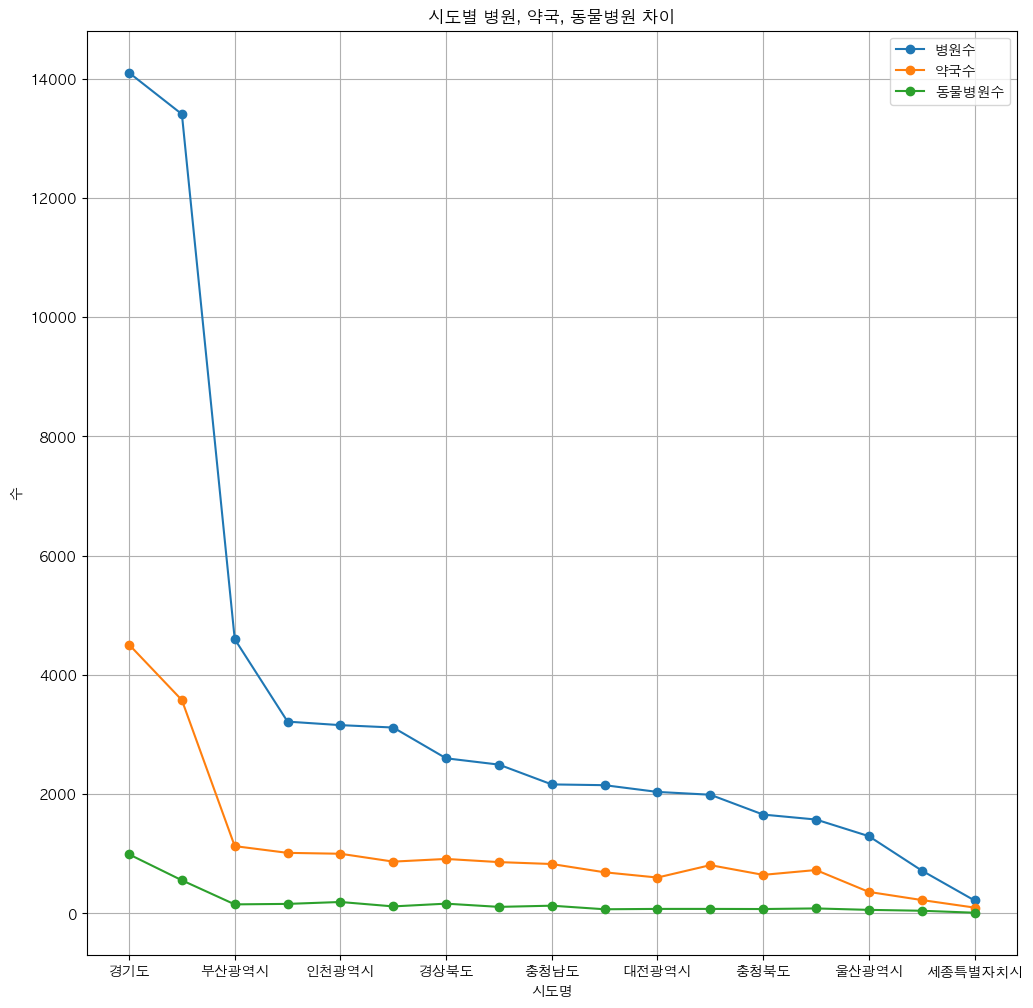

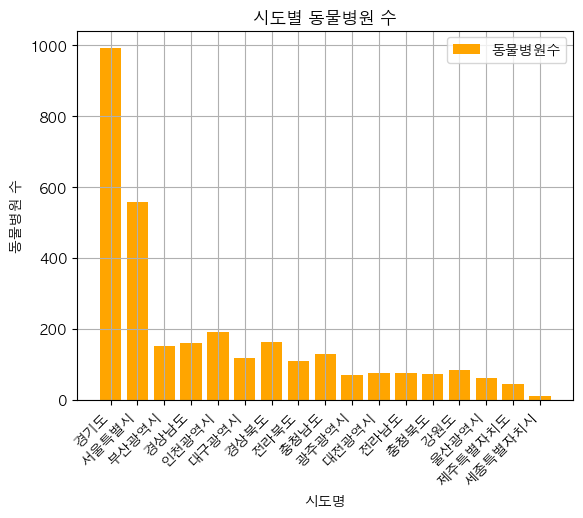

In [6]:
# 시도별 병원, 약국, 동물병원 추이
df2.plot(kind='line', x='시도명', figsize=(12, 12), marker='o', linestyle='-')
plt.title('시도별 병원, 약국, 동물병원 차이')
plt.xlabel('시도명')
plt.ylabel('수')
plt.grid(True)
plt.show()

# 동물병원에 대한 막대 그래프 추가
plt.bar(df2['시도명'], df2['동물병원수'], color='orange', label='동물병원수')
plt.legend()
plt.title('시도별 동물병원 수')
plt.xlabel('시도명')
plt.ylabel('동물병원 수')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()


In [10]:
#전체 중 경기도와 서울의 비중이 얼마나 되는지 확인 

# 경기도와 서울광역시의 데이터
gyeonggi_seoul = df2[(df2['시도명'] == '경기도') | (df2['시도명'] == '서울특별시')]

# 경기도와 서울광역시의 병원, 약국, 동물병원 수의 합
total_counts = df2[['병원수', '약국수', '동물병원수']].sum()
gyeonggi_seoul_counts = gyeonggi_seoul[['병원수', '약국수', '동물병원수']].sum()

# 비율 계산
percentage = gyeonggi_seoul_counts / total_counts * 100

print("전체 중 경기도와 서울의 비중:")
print(percentage.round(2))

# 병원, 약국, 동물병원이 모두 경기도와 서울에 전체의 40% 이상을 차지하는 등 밀집되어 있는 것으로 보인다.

전체 중 경기도와 서울의 비중:
병원수      45.45
약국수      42.84
동물병원수    50.18
dtype: float64


📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.
- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [8]:
# 서울에 소재한 병원만 선택
seoul_hospitals = df[(df['시도명'] == '서울특별시') & (df['상권업종중분류명'] == '병원')]

# 피부, 성형이 들어간 병원만 선택
skin_plastic_hospitals = seoul_hospitals[seoul_hospitals['상권업종소분류명'].str.contains('피부|성형')]

# 각 시군구별 피부과 및 성형외과 비율 계산
ratio = skin_plastic_hospitals.groupby('시군구명').size() / seoul_hospitals.groupby('시군구명').size()

# 내림차순 정렬 
ratio = ratio.sort_values(ascending=False)

# 소수점 둘째자리 반올림
print(ratio.round(2))

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
dtype: float64


📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.
- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- folium 문서 : https://python-visualization.github.io/folium/quickstart.html


In [9]:
# 서울에 소재한 노인/치매병원만 선택
geriatric_hospitals = df[(df['상권업종소분류명'] == '노인/치매병원')]
# folium(한국 중심 좌표로 지정해둠)
folium_map = folium.Map(location=[37.5665, 126.9780], zoom_start=7, tiles='OpenStreetMap')

# 모든 노인/치매병원의 위치에 마커 추가
for index, row in geriatric_hospitals.iterrows():
    latitude = row['위도']
    longitude = row['경도']
    
    # 마커 추가
    popup = folium.Popup(f"{row['상호명']}", max_width=1000)
    folium.Marker(location=[latitude, longitude], popup=popup).add_to(folium_map)

folium_map
